<a href="https://colab.research.google.com/github/Adnan4555/ADNAN-4555/blob/GEN-AI/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
#load mnist datas
(x_train, _),(x_test, _)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#normalize the data (0 to 1 range)
x_train = x_train.astype("float32") / 255.0
x_test = x_train.astype("float32")/255.0

In [ ]:
#flatten the image for the fully connected layers 2d to 1d
x_train_flat = x_train.reshape(-1,28*28)
x_test_flat = x_test.reshape(-1,28*28)

In [ ]:
#autoencoder architecture
input_img = Input(shape=(28*28,))
encoded = Dense(64,activation="relu")(input_img)

In [ ]:
#decoder
decoded = Dense(28*28,activation="sigmoid")(encoded)

In [ ]:
#model
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adam",loss='binary_crossentropy')


In [ ]:
#train the model
autoencoder.fit(x_train_flat,x_train_flat,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test_flat,x_test_flat))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.3521 - val_loss: 0.5727
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1498 - val_loss: 0.4606
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1205 - val_loss: 0.3515
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1054 - val_loss: 0.2584
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0957 - val_loss: 0.1895


In [ ]:
#reconstruct the image
reconstructed_imgs = autoencoder.predict(x_test_flat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


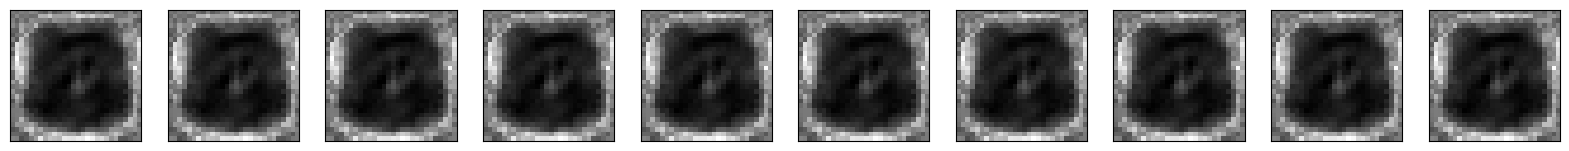

In [ ]:
#plot the original and recontructed images
n = 10
plt.figure(figsize=(20,4))
for i  in range(n):
  #display original
  ax = plt.subplot(2, n, i +1)
  plt.imshow(x_test[i],cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(reconstructed_imgs[i].reshape(28,28),cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
